# ShapeNet

## Dataset

In [1]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.ShapeNet.ShapeNetDataLoader import PartNormalDataset

from pytorch_lightning.loggers import WandbLogger

In [2]:
category = 'Airplane'
fixed_points = 256
num_workers = 10
path = osp.realpath(osp.join('..', 'data', 'ShapeNet/raw'))

test_dataset = PartNormalDataset(root=path, npoints=fixed_points, split='test', class_choice=category)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=num_workers)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(1)

In [ ]:
points, label, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [3]:
import wandb
import yaml
from test import configure

In [ ]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [ ]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [4]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/3hoq0ivl')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [5]:
model, trainer = configure(config)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [6]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/3hoq0ivl')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

tensor([[[-1.4370e-02, -4.4523e-03, -1.6903e-02,  1.7328e-02, -1.5961e-02,
           3.3176e-02],
         [-3.1412e-02,  8.3890e-02,  8.6677e-02, -2.0473e-02, -2.4611e-02,
          -3.7423e-02],
         [ 9.6370e-03, -8.9973e-03, -1.6964e-02, -1.8185e-02,  2.9643e-02,
          -6.8181e-03],
         ...,
         [ 2.9702e-03, -1.1181e-02, -1.2776e-02, -7.5060e-03,  1.3001e-02,
           6.1713e-04],
         [-2.7353e-01,  1.5531e-01, -3.8924e-01,  4.7326e-01, -3.1643e-01,
           9.2987e-01],
         [-1.7331e-01,  4.2357e-01,  4.7244e-01, -1.2888e-01, -1.1802e-01,
          -2.1053e-01]]])
tensor([[[-1.4371e-02, -4.4516e-03, -1.6904e-02,  1.7329e-02, -1.5962e-02,
           3.3179e-02],
         [-3.1412e-02,  8.3889e-02,  8.6676e-02, -2.0473e-02, -2.4611e-02,
          -3.7422e-02],
         [ 9.6371e-03, -8.9973e-03, -1.6964e-02, -1.8185e-02,  2.9643e-02,
          -6.8181e-03],
         ...,
         [ 2.9707e-03, -1.1181e-02, -1.2776e-02, -7.5065e-03,  1.3002e-02,
    

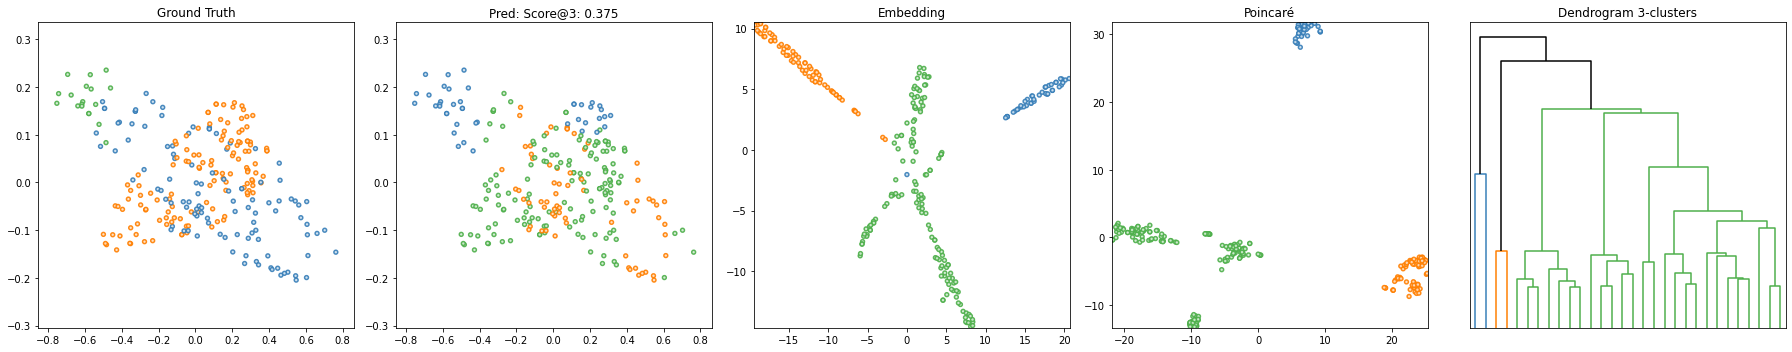

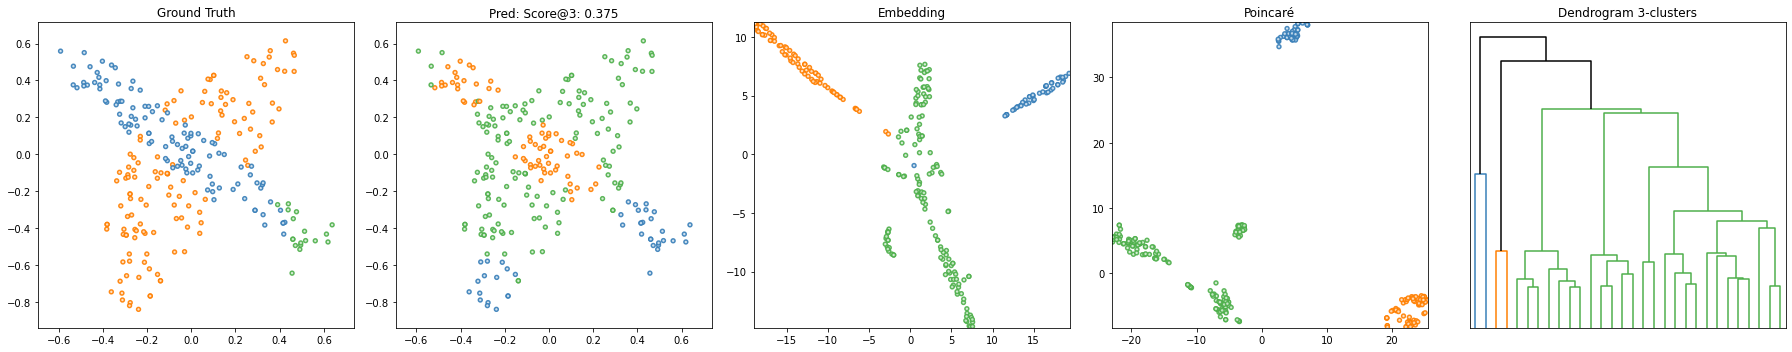

tensor(0.3749)
tensor(0.3749)
tensor([[[-0.1864,  0.1032, -0.2585,  0.3278, -0.2327,  0.6242],
         [-0.3043,  0.1687, -0.4334,  0.5260, -0.3653,  1.0374],
         [ 0.0159, -0.0251, -0.0299, -0.0219,  0.0848, -0.0214],
         ...,
         [-0.1728,  0.4210,  0.4622, -0.1208, -0.1217, -0.1957],
         [-0.2106,  0.1153, -0.2957,  0.3729, -0.2624,  0.7124],
         [-0.1071,  0.0570, -0.1593,  0.1884, -0.1254,  0.3715]]])
tensor([[[-0.1864,  0.1032, -0.2585,  0.3278, -0.2327,  0.6242],
         [-0.3043,  0.1687, -0.4334,  0.5260, -0.3653,  1.0374],
         [ 0.0159, -0.0251, -0.0299, -0.0219,  0.0848, -0.0214],
         ...,
         [-0.1728,  0.4210,  0.4622, -0.1208, -0.1217, -0.1957],
         [-0.2106,  0.1153, -0.2957,  0.3729, -0.2624,  0.7124],
         [-0.1071,  0.0570, -0.1593,  0.1884, -0.1254,  0.3715]]])


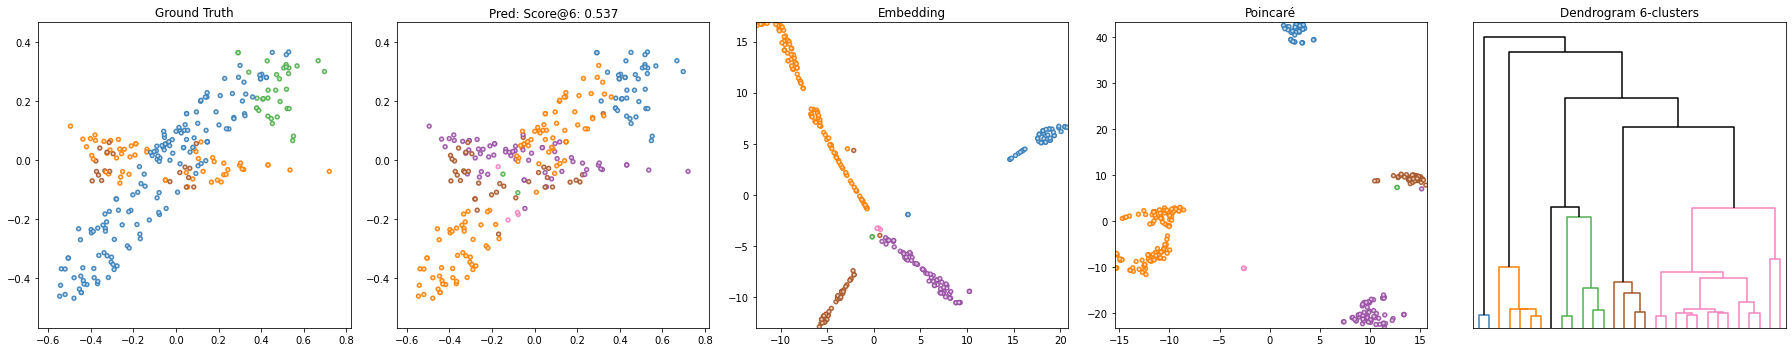

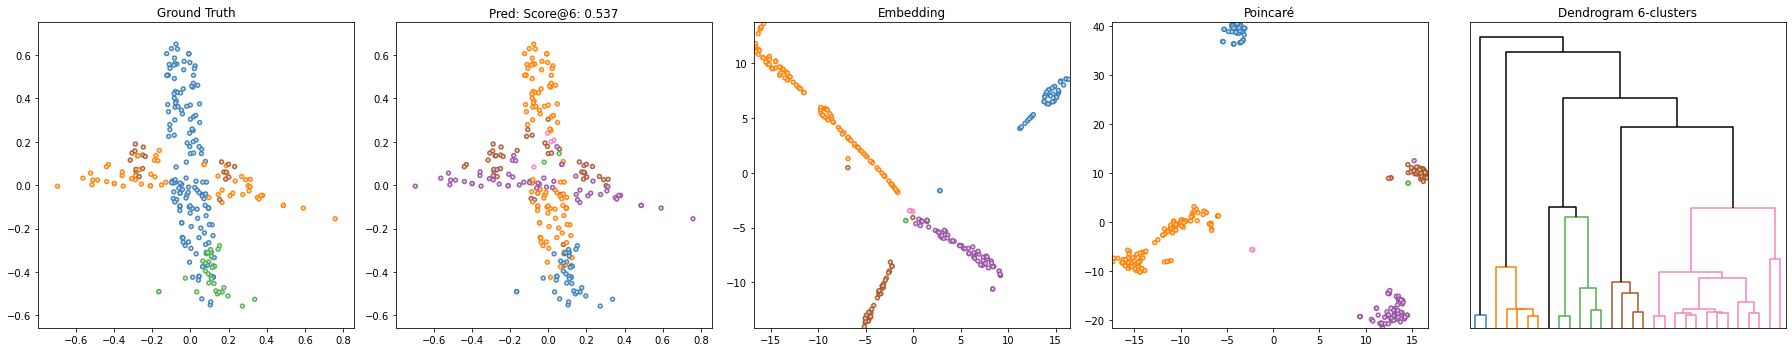

tensor(0.5374)
tensor(0.5374)
tensor([[[-0.0139,  0.0034,  0.0186, -0.0097, -0.0145, -0.0163],
         [-0.0185, -0.0511, -0.0025, -0.0213, -0.0209, -0.0129],
         [-0.2753,  0.1575, -0.3814,  0.4663, -0.3110,  0.9159],
         ...,
         [-0.0214, -0.0508, -0.0064, -0.0209, -0.0218, -0.0166],
         [-0.0533,  0.0245, -0.0725,  0.0815, -0.0522,  0.1631],
         [-0.0073, -0.0462,  0.0177, -0.0253, -0.0102,  0.0011]]])
tensor([[[-0.0139,  0.0034,  0.0186, -0.0097, -0.0145, -0.0163],
         [-0.0185, -0.0511, -0.0025, -0.0213, -0.0209, -0.0129],
         [-0.2753,  0.1575, -0.3814,  0.4663, -0.3110,  0.9159],
         ...,
         [-0.0214, -0.0508, -0.0064, -0.0209, -0.0218, -0.0166],
         [-0.0533,  0.0245, -0.0725,  0.0815, -0.0522,  0.1631],
         [-0.0073, -0.0462,  0.0177, -0.0253, -0.0102,  0.0011]]])


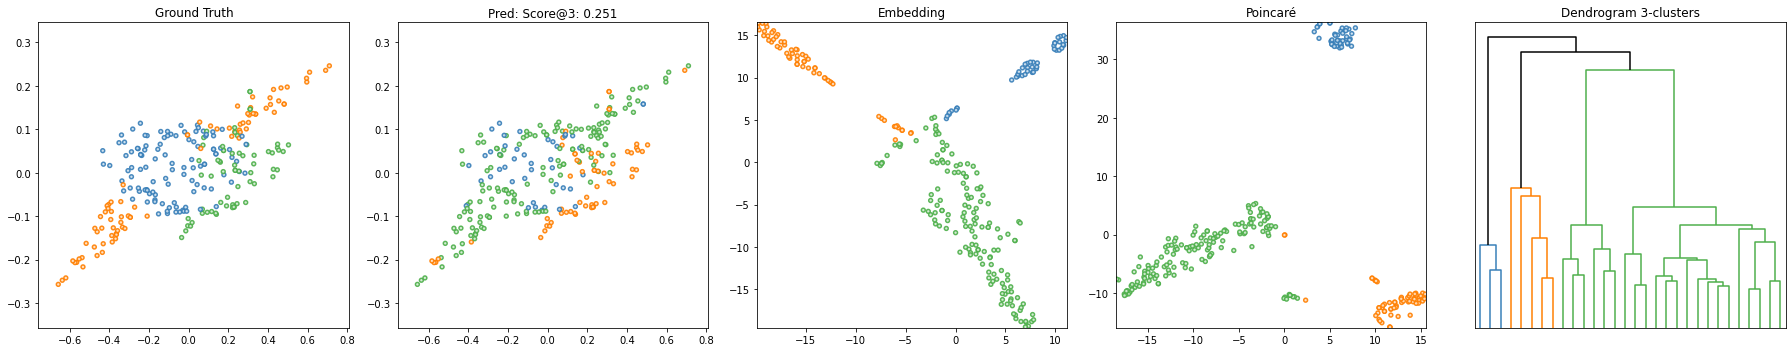

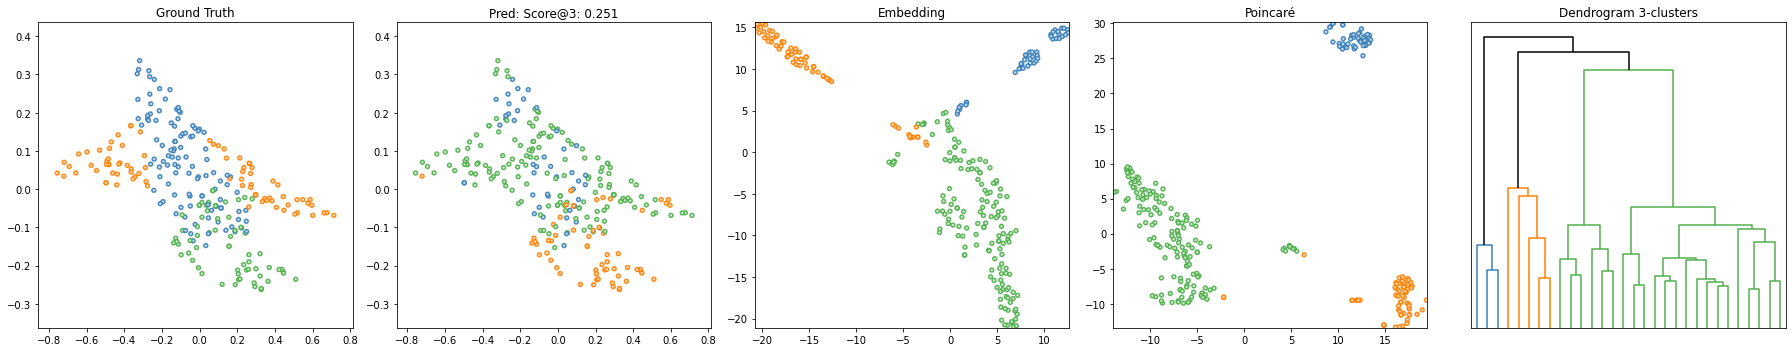

tensor(0.2507)
tensor(0.2507)
tensor([[[-0.0404, -0.0379, -0.0150, -0.0166, -0.0273, -0.0289],
         [-0.0414, -0.0456, -0.0172, -0.0184, -0.0267, -0.0253],
         [-0.0387, -0.0610, -0.0053, -0.0283, -0.0316, -0.0245],
         ...,
         [-0.2000,  0.1117, -0.2740,  0.3285, -0.2150,  0.6516],
         [-0.2803,  0.1606, -0.3902,  0.4733, -0.3142,  0.9307],
         [-0.0410, -0.0709, -0.0058, -0.0303, -0.0350, -0.0223]]])
tensor([[[-0.0404, -0.0379, -0.0150, -0.0166, -0.0273, -0.0289],
         [-0.0414, -0.0456, -0.0172, -0.0184, -0.0267, -0.0253],
         [-0.0387, -0.0610, -0.0053, -0.0283, -0.0316, -0.0245],
         ...,
         [-0.2000,  0.1117, -0.2740,  0.3285, -0.2150,  0.6516],
         [-0.2803,  0.1606, -0.3902,  0.4733, -0.3142,  0.9307],
         [-0.0410, -0.0709, -0.0058, -0.0303, -0.0350, -0.0223]]])


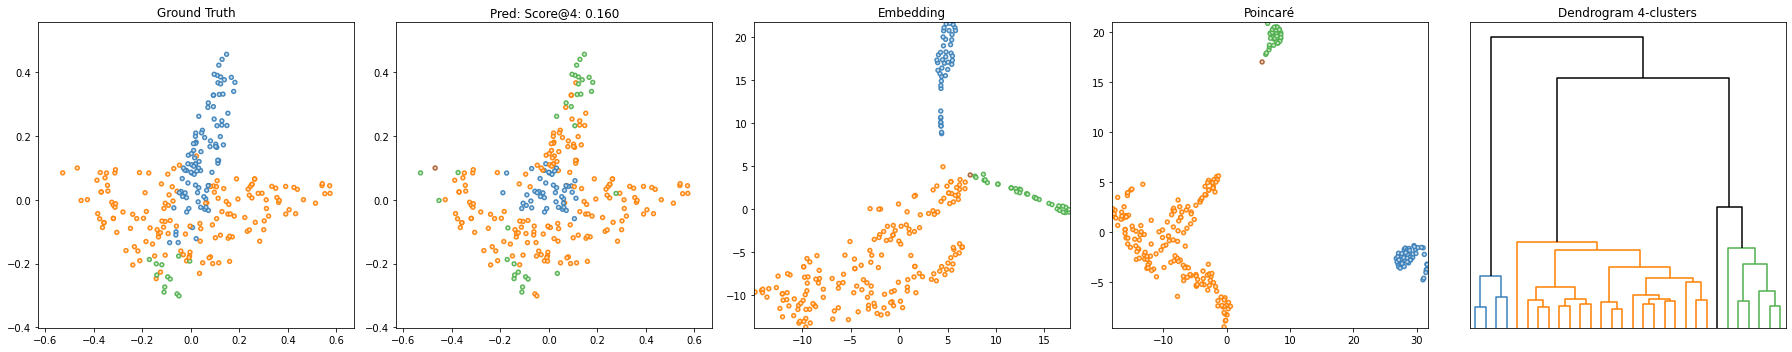

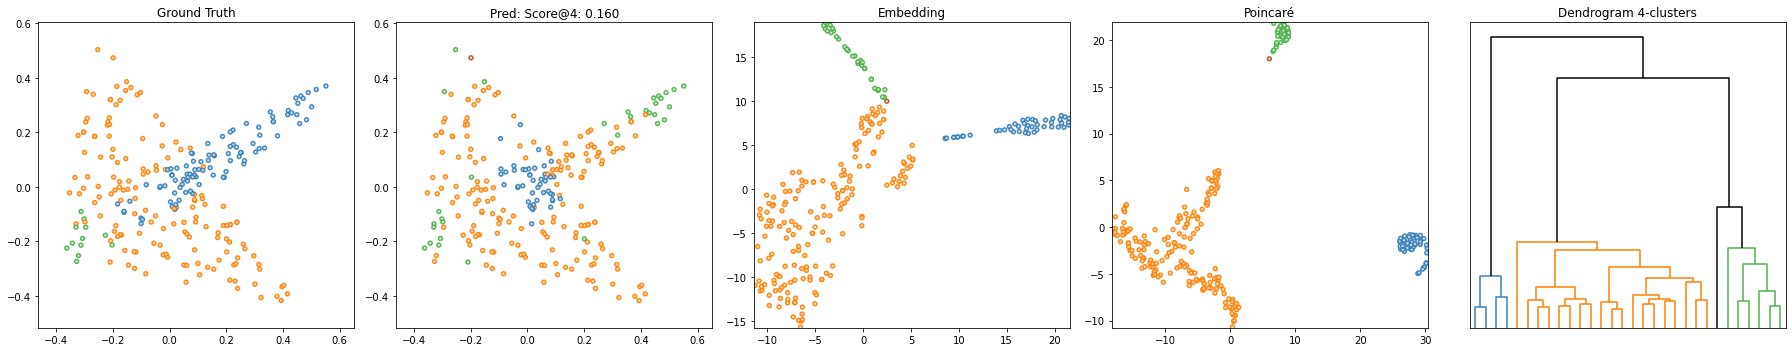

tensor(0.1597)
tensor(0.1597)
tensor([[[-6.0380e-02,  3.0001e-02, -8.1228e-02,  9.3817e-02, -6.1408e-02,
           1.8699e-01],
         [-4.8921e-02,  2.1791e-02, -6.5147e-02,  7.2975e-02, -4.9936e-02,
           1.4998e-01],
         [-2.0171e-01,  4.9110e-01,  5.4500e-01, -1.4925e-01, -1.3598e-01,
          -2.4064e-01],
         ...,
         [-1.2868e-01,  3.1736e-01,  3.4972e-01, -9.5893e-02, -8.6912e-02,
          -1.5570e-01],
         [-1.7400e-02, -5.4932e-02,  4.4089e-04, -2.5343e-02, -2.0612e-02,
          -1.3137e-02],
         [-1.1641e-02, -9.4555e-03, -7.7283e-03,  3.8719e-03, -9.1337e-03,
           1.8297e-02]]])
tensor([[[-6.0380e-02,  3.0001e-02, -8.1228e-02,  9.3817e-02, -6.1408e-02,
           1.8699e-01],
         [-4.8921e-02,  2.1791e-02, -6.5147e-02,  7.2976e-02, -4.9936e-02,
           1.4998e-01],
         [-2.0171e-01,  4.9110e-01,  5.4500e-01, -1.4925e-01, -1.3598e-01,
          -2.4064e-01],
         ...,
         [-1.2868e-01,  3.1736e-01,  3.4972e-01, 

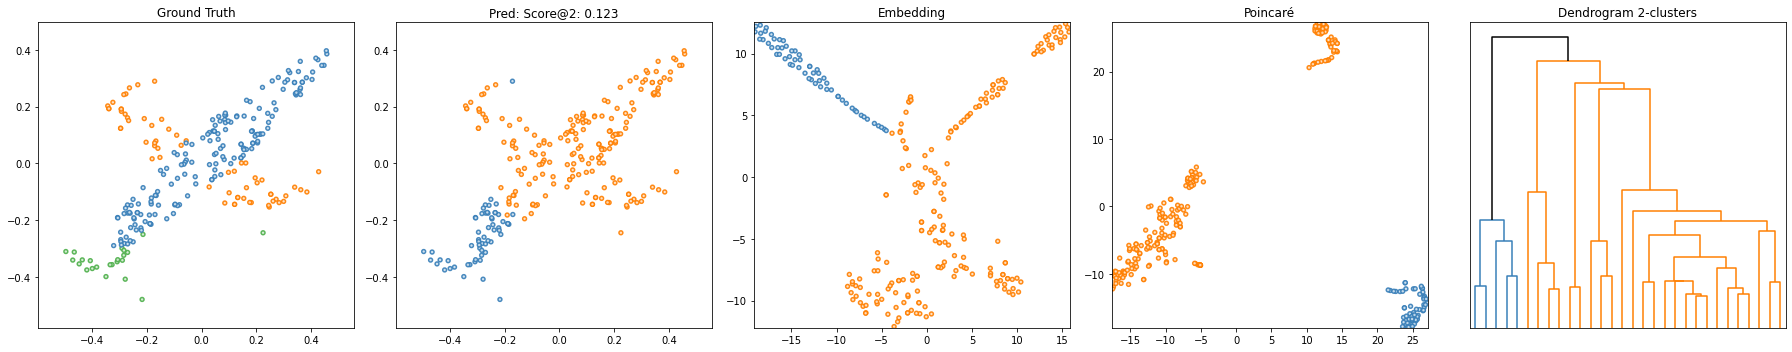

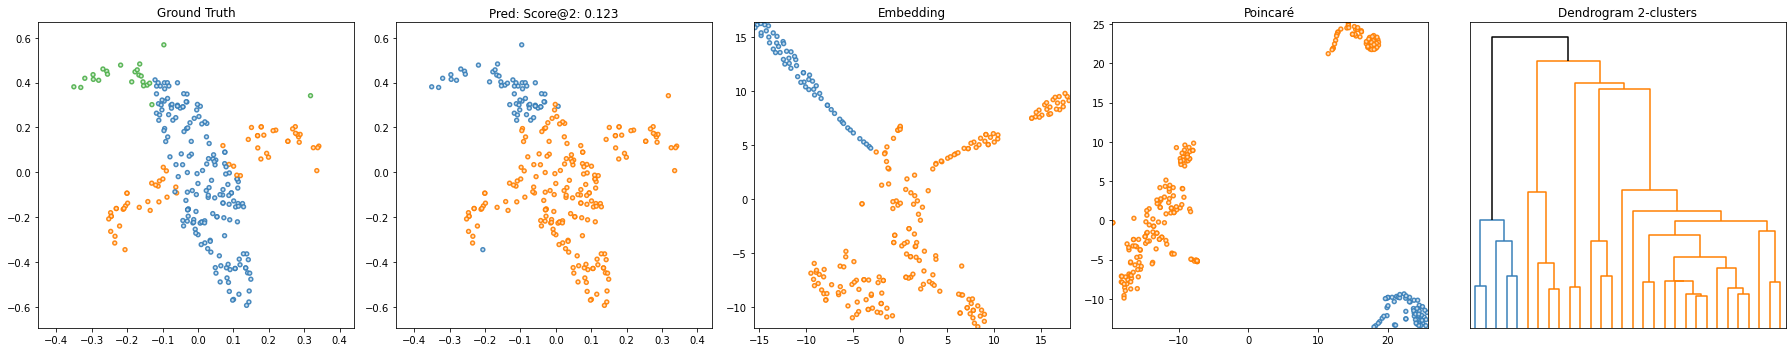

tensor(0.1229)
tensor(0.1229)
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          score             0.28911417722702026
        test_loss           1.9519283771514893
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'score': 0.28911417722702026, 'test_loss': 1.9519283771514893}]

In [7]:
trainer.test(model, test_loader)